In [1]:
import os
import pandas as pd

# Get the folder path where the files are located
#folder_inputs = r'C:\tmp\20231121_flex_testminigrid_2023-11-21_08-37-58\input\grid'
folder_inputs = r'C:\Users\smdafeis\Documents\GitHub\simona\input\2023\20231121_flex_testminigrid\grid'
if 1 == 0:
    # Filenames
    file_names = [
        'em_input.csv',
        'evcs_input.csv',
        'hp_input.csv',
        'pv_input.csv',
        'load_input.csv',
        'storage_input.csv'
    ]
    
    # Read input data
    print('Input data loading')
    
    data_input_em = pd.read_csv(os.path.join(folder_inputs,file_names[0]),index_col='uuid')
    
    # Remove em-system
    #data_input_em = data_input_em[~data_input_em['id'].str.contains('em-system')]
    
    data_input_ev = pd.read_csv(os.path.join(folder_inputs, file_names[1]),index_col='uuid')
    data_input_hp = pd.read_csv(os.path.join(folder_inputs, file_names[2]),index_col='uuid')
    data_input_pv = pd.read_csv(os.path.join(folder_inputs, file_names[3]),index_col='uuid')
    data_input_lo = pd.read_csv(os.path.join(folder_inputs, file_names[4]),index_col='uuid')
    data_input_bs = pd.read_csv(os.path.join(folder_inputs, file_names[5]),index_col='uuid')
    data_input_em

In [2]:

def create_em_to_systemparticipant_dict(em_list, system_participants_list):
    
    matching_uuids_dict = dict()
    
    for index, row in system_participants_list.iterrows():
        for em_index, em_row in em_list.iterrows():
            connected_assets = em_row['connected_assets']
            
            connected_assets_list = connected_assets.strip('[]').replace("'", "").split(', ') if isinstance(connected_assets, str) else None
                       
            if isinstance(connected_assets_list, list) and index in connected_assets:
                if em_index not in matching_uuids_dict:
                    matching_uuids_dict[em_index] = index
                else:
                    # If there are multiple occurrences, store them as a list
                    if not isinstance(matching_uuids_dict[em_index], list):
                        raise ValueError("uuid is included more then once in em")
    return matching_uuids_dict


if 0 == 1:    
    emToHp = create_em_to_systemparticipant_dict(data_input_em,data_input_hp)    
    emToEv = create_em_to_systemparticipant_dict(data_input_em,data_input_ev)
    emToBs = create_em_to_systemparticipant_dict(data_input_em,data_input_bs)
    emToPv = create_em_to_systemparticipant_dict(data_input_em,data_input_pv)
    emToLo = create_em_to_systemparticipant_dict(data_input_em,data_input_lo)
    
    


In [3]:
import csv
import datetime

def read_sort_time_series(filename, data_input):
     # Read the CSV file
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        hdr = next(reader)
        num = len(hdr) - 1  # Number of columns
        
        # Interpret timestamp
        timestamp = [datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S') for row in reader]

    # Get UnitIDs
    unitIDs = hdr[1:]
    nUnits = len(unitIDs)

    # Read data and handle exceptions
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        try:
            time_series = [[float(val) for val in row[1:]] for row in reader]
        except ValueError:
            data = list(reader)
            L = [len(row) - 1 for row in data]
            time_series = []
            for i, row in enumerate(data):
                vals = [float(val) if val else float('nan') for val in row[1:]]
                vals.extend([float('nan')] * (max(L) - L[i]))
                time_series.append(vals)

    # Adjust sorting based on input data
    time_series_sort = [[float('nan') for _ in range(nUnits)] for _ in range(len(time_series))]
    for i in range(nUnits):
        for j, uuid in enumerate(inputs['uuid']):
            if uuid in unitIDs:
                xx = unitIDs.index(uuid)
                if xx < nUnits:
                    time_series_sort[:, i] = time_series[:, xx]

    return time_series_sort

In [4]:
import pandas as pd
import numpy as np
import os
import csv
from datetime import datetime
from pypsdm.processing.series import (
    add_series,)
from pypsdm.models.result import (
    entity,)
from pypsdm.models import (
    enums,)


#folder_res = r'C:\tmp\20231121_flex_testminigrid_2023-11-21_08-37-58\rawOutputData'
folder_res = r'C:\Users\smdafeis\Documents\GitHub\simona\output\2023\20231218_household_test\20231218_household_test_2023-12-18_11-56-08\rawOutputData'
filename_hp = "hp_res.csv"
filename_ev = "evcs_res.csv"
filename_pv = "pv_res.csv"
filename_lo = "load_res.csv"
filename_bs = "storage_res.csv"

filename = os.path.join(folder_res, filename_hp)   
     
timeseries_data = pd.read_csv(os.path.join(folder_res, filename_hp))
#print(timeseries_data)

#print(len(timeseries_data.loc[1,:].values[4]))

#endtime = datetime(2020,1,1)
endtime = datetime(2019,12,31)

if 0 == 1:


    # Function to add seconds if they're missing from the timestamp
    # Function to add seconds if they're missing from the timestamp
    def add_seconds(timestamp):
        if len(timestamp) == 22 and timestamp.endswith('Z[UTC]'):  # Check if seconds are missing and ends with 'Z[UTC]'
            timestamp = timestamp[:-6] + ':00' + timestamp[-6:]  # Insert ':00' before 'Z[UTC]'
        return timestamp
    
    
    # Add seconds to all timestamps
    timeseries_data['time'] = timeseries_data['time'].apply(add_seconds)
    
    # Convert 'time' column to datetime format with optional seconds
    timeseries_data['time'] = pd.to_datetime(timeseries_data['time'], format='%Y-%m-%dT%H:%M:%SZ[UTC]')
    
    # Format 'time' column to the desired string format
    timeseries_data['time'] = timeseries_data['time'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    #specific_model = 'd3413988-ebcd-4aff-b5b5-d70364a3b7a2'  # Replace this with the specific entry you want to filter for
    #filtered_df = timeseries_data[timeseries_data['input_model'] == specific_model]
    #filtered_df.set_index(['time','input_model'],inplace=True)
    timeseries_data.set_index(['time','input_model'],inplace=True)
    
    
    
    
    
    #d34=entity.ResultEntities.build(enums.SystemParticipantsEnum.HEAT_PUMP,specific_model, timeseries_data, endtime)
    #print(d34)
    


In [2]:
from pypsdm.models.input.container.participants import SystemParticipantsContainer
from pypsdm.models.result.container.participants import ParticipantsResultContainer
from pypsdm.models import gwr

gwr = gwr.GridWithResults.from_csv('flex_minigrid', folder_inputs,',',folder_res,',', simulation_end=endtime)


In [6]:
gwr.results.participants.hps

PQResultDict(entity_type=<SystemParticipantsEnum.HEAT_PUMP: 'hp'>, entities={})

In [7]:
# Vorhandene Fälle
# PV immer an
# 1. Spalte: BS
# 2. Spalte: EV
# 3. Spalte: HP vorhanden
# 4. Spalte: neue HP & Dämmung


cases = [
    (1, 1, 1, 1),
    (1, 1, 1, 0),
    (1, 1, 0, 1),
    (1, 1, 0, 0),
    (1, 0, 1, 1),
    (1, 0, 1, 0),
    (1, 0, 0, 1),
    (1, 0, 0, 0),
    (0, 1, 1, 1),
    (0, 1, 1, 0),
    (0, 1, 0, 1),
    (0, 1, 0, 0),
    (0, 0, 1, 1),
    (0, 0, 1, 0),
    (0, 0, 0, 1),
    (0, 0, 0, 0),
]

# Resultierende Fälle für GLZ => Remove wenn 3. Spalte == 1 und Spalte 1 und 2 nicht 1

filtered_cases = [case for case in cases if case[2] != 0 or case[0] == 1 or case[1] == 1]

filtered_cases

# Fälle Binär-codiert (1,1,1,1 ==15)
# Gemeinsame Analyse von 
# Fall 14 und Fall 15 (identisch nur neue oder alte WP & Dämmung) => BS + EV + WP
# 13 und 12 (identisch) => BS + EV
# 11 und 10 (identisch nur neue oder alte WP & Dämmung) BS + WP 
# 9 und 8 (identisch) => Nur BS
# 7 und 6 (identisch nur neue oder alte WP & Dämmung) => EV + WP 
# 4 und 5 (identisch) => Nur EV
# 2 und 3 (identisch nur neue oder alte WP & Dämmung) => Nur WP




[(1, 1, 1, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 1, 0, 0),
 (1, 0, 1, 1),
 (1, 0, 1, 0),
 (1, 0, 0, 1),
 (1, 0, 0, 0),
 (0, 1, 1, 1),
 (0, 1, 1, 0),
 (0, 1, 0, 1),
 (0, 1, 0, 0),
 (0, 0, 1, 1),
 (0, 0, 1, 0)]

In [8]:

folder_glz_cases = r'C:\tmp\20231121_flex_testminigrid_2023-11-21_08-37-58\input\GLZ'
file_name_glz_cases = 'em_to_case_dict.csv'
em_cases_dict = pd.read_csv(os.path.join(folder_glz_cases, file_name_glz_cases), index_col=0).rename_axis(index='em_uuid')

em_cases_dict

,0,1,2,3
em_uuid,,,,
82a5963e-8b34-4909-a6fe-f8a5d630714f,1,1,1,1
a20a27bc-d8dc-474a-a067-13768efa12b0,1,1,1,1
368b7d20-246c-47b4-99d9-59ecb09d262f,1,1,1,1
7578de94-39da-461a-a7e9-35887d5cd069,1,1,1,1
32bdf883-bf93-41d4-8df0-341c643c0dde,1,1,1,1
fc066082-5114-46dc-81e9-aadd5bdb5a5c,1,1,1,0
c91910c7-8052-439d-bbb5-82a9a6f33805,1,1,1,0
97cbb95f-ba3d-4cf2-ab8a-ebf6cd581bf2,1,1,1,0
da9b5c51-9fcc-4b3f-9fcb-331b5fe9071e,1,1,1,0


In [9]:
ems_grid = gwr.grid.participants.ems
ems_results=gwr.results.participants.ems

In [10]:
def getEmInstalledCapacatiyFromUuid(em_uuid, ems_grid):

    load_srated=0
    hp_srated=0
    evcs_srated=0
    bs_srated=0
    pv_srated=0
    total_s_rated_em_load_direction = 0
    total_s_rated_em_feedin_direction = 0
    em_installed_capacity = pd.DataFrame(columns=['s_rated_em_load_direction', 's_rated_em_feedin_direction'])   
    
    for conected_asset in ems_grid.connected_assets.get(em_uuid):
        if gwr.grid.participants.loads.__contains__(conected_asset):
            load_srated=gwr.grid.participants.loads.get(conected_asset)['s_rated']     
        if gwr.grid.participants.hps.__contains__(conected_asset):
            hp_srated=gwr.grid.participants.hps.get(conected_asset)['s_rated']
        if gwr.grid.participants.evcs.__contains__(conected_asset):
            evcs_srated=gwr.grid.participants.evcs.get(conected_asset)['power']
        if gwr.grid.participants.storages.__contains__(conected_asset):
            bs_srated=gwr.grid.participants.storages.get(conected_asset)['s_rated']
        if gwr.grid.participants.pvs.__contains__(conected_asset):
            pv_srated=gwr.grid.participants.pvs.get(conected_asset)['s_rated']
            
    ##### TODO FIXME: LOAD INCLUDED HERE OR NOT????????????????????????????????????????????????????????????????????
    s_rated_em_load_direction = load_srated + hp_srated + evcs_srated + bs_srated
    s_rated_em_feedin_direction = evcs_srated + bs_srated + pv_srated
    em_installed_capacity.loc[em_uuid]= [s_rated_em_load_direction,s_rated_em_feedin_direction]
                
    return em_installed_capacity

In [11]:
print(em_cases_dict)

                                      0  1  2  3
em_uuid                                         
82a5963e-8b34-4909-a6fe-f8a5d630714f  1  1  1  1
a20a27bc-d8dc-474a-a067-13768efa12b0  1  1  1  1
368b7d20-246c-47b4-99d9-59ecb09d262f  1  1  1  1
7578de94-39da-461a-a7e9-35887d5cd069  1  1  1  1
32bdf883-bf93-41d4-8df0-341c643c0dde  1  1  1  1
fc066082-5114-46dc-81e9-aadd5bdb5a5c  1  1  1  0
c91910c7-8052-439d-bbb5-82a9a6f33805  1  1  1  0
97cbb95f-ba3d-4cf2-ab8a-ebf6cd581bf2  1  1  1  0
da9b5c51-9fcc-4b3f-9fcb-331b5fe9071e  1  1  1  0
268ac12a-5617-4de7-a63a-27a2ae13fbf9  1  1  1  0
54c41a9b-071b-4ac4-ba52-daa5adf82281  1  1  0  1
e791a888-38dd-481a-9558-e15e3780d887  1  1  0  1
a03331b0-29a1-4547-a439-d6ec01c7b5ec  1  1  0  1
2717884a-acd0-475a-809b-e4c3e904aa1e  1  1  0  1
3f846f16-d139-47d7-ab3f-5cdd0c695d86  1  1  0  1
5468b04e-ade9-4443-86ac-365b443b0dc2  1  1  0  0
b62da8a1-8b4c-47cb-8bd7-8a9e5bc71ad2  1  1  0  0
e1600448-5fa5-4ba2-8938-eaf768f2d7fa  1  1  0  0
53d9ead4-a565-4a00-9

In [12]:
def getCasesFromConditions(dict, cond1, cond2, cond3, cond4):
    filtered_uuids = []
    
    # Loop through the dictionary items and filter based on conditions
    for uuid, values in dict.iterrows():
        if values[0] == cond1 and values[1] == cond2 and values[2] == cond3 and values[3] == cond4:
            filtered_uuids.append(uuid)
    return  filtered_uuids


In [13]:
test = getCasesFromConditions(em_cases_dict, 1,1,1,1)
print(test)

['82a5963e-8b34-4909-a6fe-f8a5d630714f', 'a20a27bc-d8dc-474a-a067-13768efa12b0', '368b7d20-246c-47b4-99d9-59ecb09d262f', '7578de94-39da-461a-a7e9-35887d5cd069', '32bdf883-bf93-41d4-8df0-341c643c0dde']


In [14]:
if 1 == 0:
    for item in test:
        getEmInstalledCapacatiyFromUuid(item, ems_grid)
    

In [15]:
em_installed_capacity_res = pd.DataFrame(columns=['s_rated_em_load_direction', 's_rated_em_feedin_direction'])   
for item in test:
    val = getEmInstalledCapacatiyFromUuid(item, ems_grid)
    em_installed_capacity_res.loc[item]= [val.values[0][0], val.values[0][1]]
    

em_installed_capacity_res

,s_rated_em_load_direction,s_rated_em_feedin_direction
82a5963e-8b34-4909-a6fe-f8a5d630714f,39.234324,41.823098
a20a27bc-d8dc-474a-a067-13768efa12b0,37.890073,39.287530
368b7d20-246c-47b4-99d9-59ecb09d262f,38.541396,39.825692
7578de94-39da-461a-a7e9-35887d5cd069,38.173961,37.580415
32bdf883-bf93-41d4-8df0-341c643c0dde,38.356602,38.752785


In [16]:
test2 = em_cases_dict.index.tolist()
test2

['82a5963e-8b34-4909-a6fe-f8a5d630714f',
 'a20a27bc-d8dc-474a-a067-13768efa12b0',
 '368b7d20-246c-47b4-99d9-59ecb09d262f',
 '7578de94-39da-461a-a7e9-35887d5cd069',
 '32bdf883-bf93-41d4-8df0-341c643c0dde',
 'fc066082-5114-46dc-81e9-aadd5bdb5a5c',
 'c91910c7-8052-439d-bbb5-82a9a6f33805',
 '97cbb95f-ba3d-4cf2-ab8a-ebf6cd581bf2',
 'da9b5c51-9fcc-4b3f-9fcb-331b5fe9071e',
 '268ac12a-5617-4de7-a63a-27a2ae13fbf9',
 '54c41a9b-071b-4ac4-ba52-daa5adf82281',
 'e791a888-38dd-481a-9558-e15e3780d887',
 'a03331b0-29a1-4547-a439-d6ec01c7b5ec',
 '2717884a-acd0-475a-809b-e4c3e904aa1e',
 '3f846f16-d139-47d7-ab3f-5cdd0c695d86',
 '5468b04e-ade9-4443-86ac-365b443b0dc2',
 'b62da8a1-8b4c-47cb-8bd7-8a9e5bc71ad2',
 'e1600448-5fa5-4ba2-8938-eaf768f2d7fa',
 '53d9ead4-a565-4a00-9e31-4b6336d94503',
 '9a824deb-3993-481e-9652-25a456922dd4',
 'f596c0f1-efc1-4314-a92f-254469585926',
 'e2a21ad1-c3a8-436d-8473-ea7613c31694',
 '76a09edf-b8e1-4cd7-9a86-57f941662fb9',
 '2a103ae2-9dc4-44f7-b31e-94fd0d8419df',
 '92a39693-16e3-

In [17]:
em_installed_capacity_res_2 = pd.DataFrame(columns=['s_rated_em_load_direction', 's_rated_em_feedin_direction'])   
for item in test2:
    val = getEmInstalledCapacatiyFromUuid(item, ems_grid)
    em_installed_capacity_res_2.loc[item]= [val.values[0][0], val.values[0][1]]
    

em_installed_capacity_res_2

,s_rated_em_load_direction,s_rated_em_feedin_direction
82a5963e-8b34-4909-a6fe-f8a5d630714f,39.234324,41.823098
a20a27bc-d8dc-474a-a067-13768efa12b0,37.890073,39.287530
368b7d20-246c-47b4-99d9-59ecb09d262f,38.541396,39.825692
7578de94-39da-461a-a7e9-35887d5cd069,38.173961,37.580415
32bdf883-bf93-41d4-8df0-341c643c0dde,38.356602,38.752785
fc066082-5114-46dc-81e9-aadd5bdb5a5c,34.981740,36.984494
c91910c7-8052-439d-bbb5-82a9a6f33805,36.254994,38.683048
97cbb95f-ba3d-4cf2-ab8a-ebf6cd581bf2,37.409071,43.875149
da9b5c51-9fcc-4b3f-9fcb-331b5fe9071e,35.242624,37.549176
268ac12a-5617-4de7-a63a-27a2ae13fbf9,35.903980,40.742874


In [18]:
print(em_installed_capacity_res.loc['a20a27bc-d8dc-474a-a067-13768efa12b0','s_rated_em_load_direction'])


37.89007324623006


In [19]:
if 0 ==1:
    uu = '019f1307-e73e-40b2-9277-22f960aafc1e'
    gwr.results.participants.evcs.get(uu).p.max()

In [20]:
from pypsdm.processing.series import quarter_hourly_mean_resample
if 0 == 1 :
    df_res = quarter_hourly_mean_resample(gwr.results.participants.ems.p)
    df_res = df_res.filter(em_installed_capacity_res.index)
    for column in df_res.columns:
        print(column)

In [21]:
def normalize_dataframe_min_max(df):
    normalized_df = df  # Create a copy of the original DataFrame
    
    # Loop through each column in the DataFrame
    for column in df.columns:
        # Check if the column contains numerical data (you may want to refine this condition based on your specific DataFrame)
        if df[column].dtype in [int, float]:
                min_val = df[column].min()  # Calculate the minimum value of the column
                max_val = df[column].max()  # Calculate the maximum value of the column
            
                # Min-Max normalization formula: (x - min) / (max - min)
                normalized_df[column] = (df[column] - min_val) / (max_val - min_val)
    
    return normalized_df

In [22]:
from pypsdm.processing.series import quarter_hourly_mean_resample

for item in gwr.results.participants.evcs:
    test=(quarter_hourly_mean_resample(gwr.results.participants.evcs.get(item).p))
    

In [23]:
em_installed_capacity_res= em_installed_capacity_res.rename_axis('uuid')
em_installed_capacity_res

,s_rated_em_load_direction,s_rated_em_feedin_direction
uuid,,
82a5963e-8b34-4909-a6fe-f8a5d630714f,39.234324,41.823098
a20a27bc-d8dc-474a-a067-13768efa12b0,37.890073,39.287530
368b7d20-246c-47b4-99d9-59ecb09d262f,38.541396,39.825692
7578de94-39da-461a-a7e9-35887d5cd069,38.173961,37.580415
32bdf883-bf93-41d4-8df0-341c643c0dde,38.356602,38.752785


In [24]:
uuid_to_search = '32bdf883-bf93-41d4-8df0-341c643c0dde'  # Replace with the UUID you're searching for

# Filter the DataFrame based on the UUID
filtered_row = em_installed_capacity_res[em_installed_capacity_res.index == uuid_to_search]

if not filtered_row.empty:
    first_column_value = filtered_row.iloc[0, 0]  # Assuming the first column is at index 0
    print("Value from the first column:", first_column_value)
else:
    print("UUID not found in the DataFrame")


Value from the first column: 38.35660233400342


In [1]:
from pypsdm.analysis.concurrency import (calc_glg, curve_regression, do_all_glg_plots)
from datetime import datetime
from pypsdm.processing.series import quarter_hourly_mean_resample

# Get the folder path where the files are located
folder_inputs = r'C:\tmp\20231121_flex_testminigrid_2023-11-21_08-37-58\input\grid'
folder_res = r'C:\tmp\20231121_flex_testminigrid_2023-11-21_08-37-58\rawOutputData'
# endtime = datetime(2020,1,1)
endtime = datetime(2019, 12, 31)



# Parameter, die einzustellen sind:
#num_vehicles = 100
# len_curve = 150  # Ziel: 150, gibt die maximale Anzahl an EV innerhalb der GZ-Kurve an
len_curve = 25  # Ziel: 150, gibt die maximale Anzahl an EV innerhalb der GZ-Kurve an
num_mc = 150  # Ziel: 1000, Anzahl an Monte-Carlo-Iterationen pro Punkt in der GZ-Kurve

"""
 Initialisierung
"""


# Initialisierung
#temp_profile = pd.DataFrame(np.zeros(shape=(0, num_vehicles)))
#temp_sim = pd.DataFrame(np.zeros(shape=(num_mc, 1)))

# Einlesen der Daten:

df_resample = quarter_hourly_mean_resample(gwr.results.participants.loads.p)
# df_resample = df_resample.filter(em_installed_capacity_res.index)
# df_norm = normalize_dataframe_by_installed_capacity(df_resample, em_installed_capacity_res)
# df_norm = normalize_dataframe_min_max(df_resample)
df = df_resample

sim_curve, quantile_95, quantile_95_tot, quantile_95_indices = calc_glg(df,em_installed_capacity_res_2, len_curve, num_mc)

curve_regression(quantile_95_indices,quantile_95, quantile_95_tot)

do_all_glg_plots(x,y,sim_curve,quantile_95_tot)



NameError: name 'gwr' is not defined

Calculate GZ for ev-number 1
Calculate GZ for ev-number 2
Calculate GZ for ev-number 3
Calculate GZ for ev-number 4
Calculate GZ for ev-number 5
Calculate GZ for ev-number 6
Calculate GZ for ev-number 7
Calculate GZ for ev-number 8
Calculate GZ for ev-number 9
Calculate GZ for ev-number 10
Calculate GZ for ev-number 11
Calculate GZ for ev-number 12
Calculate GZ for ev-number 13
Calculate GZ for ev-number 14
Calculate GZ for ev-number 15
Calculate GZ for ev-number 16
Calculate GZ for ev-number 17
Calculate GZ for ev-number 18
Calculate GZ for ev-number 19
Calculate GZ for ev-number 20
Calculate GZ for ev-number 21
Calculate GZ for ev-number 22
Calculate GZ for ev-number 23
Calculate GZ for ev-number 24
Calculate GZ for ev-number 25


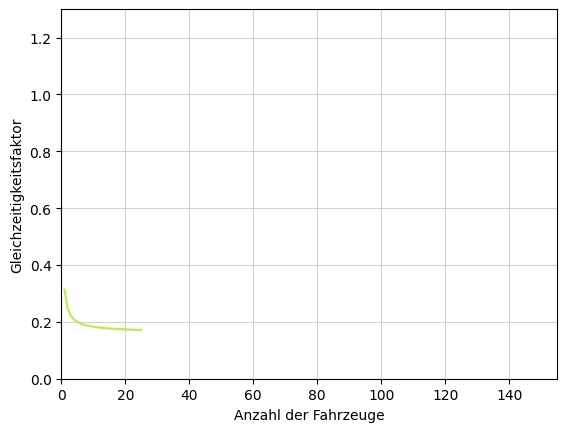

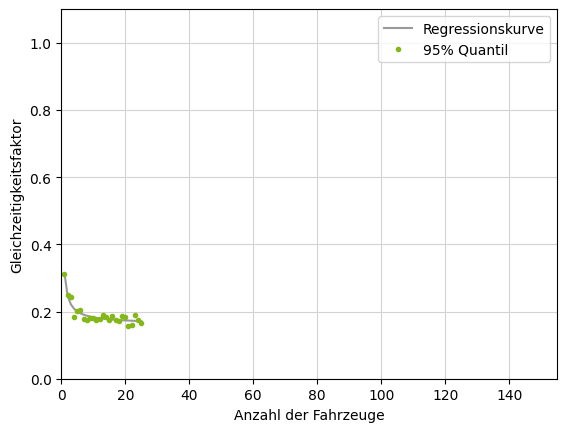

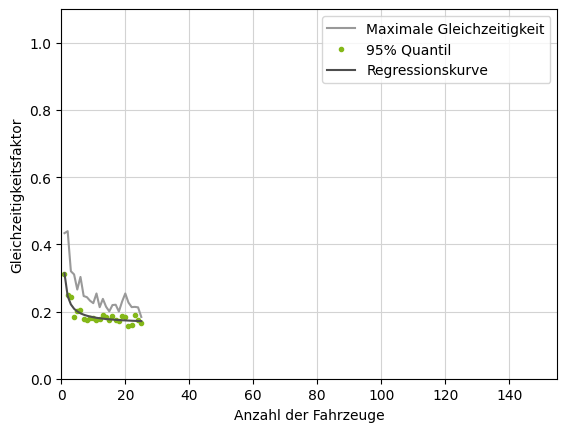

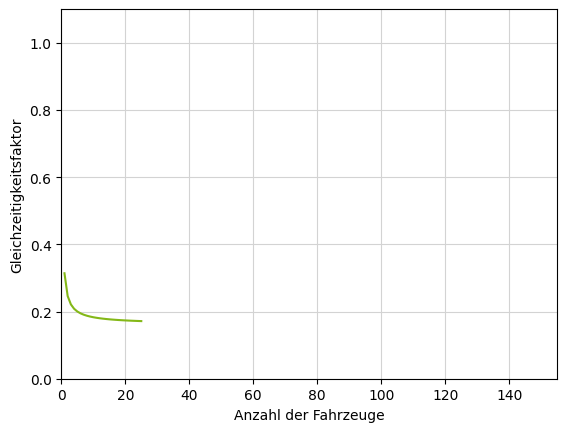

In [28]:
"""
 Initialisierung
"""
# Parameter, die einzustellen sind:
num_vehicles = 100
#len_curve = 150  # Ziel: 150, gibt die maximale Anzahl an EV innerhalb der GZ-Kurve an
len_curve = 25 # Ziel: 150, gibt die maximale Anzahl an EV innerhalb der GZ-Kurve an
num_mc = 150  # Ziel: 1000, Anzahl an Monte-Carlo-Iterationen pro Punkt in der GZ-Kurve

# Initialisierung
temp_profile = pd.DataFrame(np.zeros(shape=(0, num_vehicles)))
temp_sim = pd.DataFrame(np.zeros(shape=(num_mc, 1)))

# Einlesen der Daten:

df_resample = quarter_hourly_mean_resample(gwr.results.participants.loads.p)
#df_resample = df_resample.filter(em_installed_capacity_res.index)
#df_norm = normalize_dataframe_by_installed_capacity(df_resample, em_installed_capacity_res)
#df_norm = normalize_dataframe_min_max(df_resample)
df_norm = df_resample

# Start: GZ-Kurve
sim_curve, quantile_95_tot = calculate_gz(df_norm, em_installed_capacity_res_2, len_curve, num_mc)
quantile_95_cut = quantile_95_tot.iloc[:, 0] < 1
quantile_95 = quantile_95_tot.loc[quantile_95_cut, 0].to_numpy()
quantile_95_indices = pd.Series(range(1, len(quantile_95)+1)).to_numpy()

if 1 ==1 :
    # Kurvenregression
    param_opt, param_cov, r_squared = fit_sim_curve(quantile_95_indices, quantile_95)
    a_opt, b_opt, c_opt = param_opt
    fitted_sim = fit_function(quantile_95_indices, a_opt, b_opt, c_opt)
    
    x = np.arange(1, len(quantile_95_tot[0]) + 1)
    y = np.ones_like(quantile_95_tot[0])
    y[quantile_95_tot[0] < 1] = fitted_sim[:len(fitted_sim)]
    

if 1 == 1:
    """
    Plots
    """
    # Plot 2
    #plt.plot(x, gz_bi, label='V2G (Laden)', color=(0.517, 0.721, 0.094))
    #plt.plot(x, gz_bi_dis, label='V2G (Entladen)', color=(0.3, 0.3, 0.3))
    plt.plot(x, y, label='Unidirektional', color=(0.717, 0.921, 0.294))
    #plt.plot(x_unc, gz_unc, label='Ungesteuertes Laden', color=(0.6, 0.6, 0.6))
    plt.grid(color='lightgrey', linestyle='-')
    plt.xlabel('Anzahl der Fahrzeuge')
    plt.ylim(0, 1.3)
    plt.xlim(0, 155)
    plt.ylabel('Gleichzeitigkeitsfaktor')
    #plt.legend()
    plt.show()
    
    plt.plot(x, y, label='Regressionskurve', color=(0.6, 0.6, 0.6))
    plt.plot((quantile_95_tot.index + 1), quantile_95_tot, '.', label='95% Quantil', color=(0.517, 0.721, 0.094))
    plt.grid(color='lightgrey', linestyle='-')
    plt.xlabel('Anzahl der Fahrzeuge')
    plt.ylim(0, 1.1)
    plt.xlim(0, 155)
    plt.ylabel('Gleichzeitigkeitsfaktor')
    plt.legend()
    plt.show()
    
    # Plot 1
    plt.plot((sim_curve.index + 1), sim_curve, label='Maximale Gleichzeitigkeit', color=(0.6, 0.6, 0.6))
    plt.grid(color='lightgrey', linestyle='-')
    plt.plot((quantile_95_tot.index + 1), quantile_95_tot, '.', label='95% Quantil', color=(0.517, 0.721, 0.094))
    plt.plot(x, y, label='Regressionskurve', color=(0.3, 0.3, 0.3))
    plt.xlabel('Anzahl der Fahrzeuge')
    plt.ylim(0, 1.1)
    plt.xlim(0, 155)
    plt.ylabel('Gleichzeitigkeitsfaktor')
    plt.legend()
    plt.show()
    
    # Plot 3
    plt.plot(x, y, label='95% Quantil', color=(0.517, 0.721, 0.094))
    plt.grid(color='lightgrey', linestyle='-')
    plt.xlabel('Anzahl der Fahrzeuge')
    plt.ylim(0, 1.1)
    plt.xlim(0, 155)
    plt.ylabel('Gleichzeitigkeitsfaktor')
    plt.show()


In [30]:
testdf=gwr.results.participants.loads.get('a30bb0a8-e3c1-4575-8d85-a0f4743e0722').p
profile_row = datetime(2019,1,9,0,30)
load=testdf[profile_row]
print('load ' + load.__str__())

testdf=gwr.results.participants.pvs.get('53b6196d-11e7-45d5-b5e3-7afff2aeb44a')
pvs=testdf[profile_row].p.values

print('pv ' + pvs.__str__())

testdf=gwr.results.participants.storages.get('438ca8f7-f8f2-4f5e-8214-a2ac8122f0a0')
print('storage ' + testdf[profile_row].p.values.__str__())

testdf=gwr.results.participants.evcs.get('5abd3b40-3553-4a26-90a5-ed234380ed51')
print('evcs ' + testdf[profile_row].p.values.__str__())

testdf=gwr.results.participants.hps.get('e0fd50f1-bbbe-4817-b378-38835d440c0c')
hps = testdf[profile_row].p.values
print('hps ' + hps.__str__())

summe = load + hps
print(summe)

load 0.0006915860014892033
pv [0.]
storage [0.]
evcs [0.]
hps [0.00555915]
[0.00625074]
